In [207]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [208]:
#read csv file
df=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/cleaned_data1.csv')
df.head(5)

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [209]:
#filter the data
filtered_data = df.groupby(['month','product', 'variant','market','platform', 'channel']).agg({
    'quantity': 'sum'
}).reset_index()

filtered_data.head()


,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [210]:
#find its shape
filtered_data.shape

(215453, 7)

In [211]:
filtered_data.head()

,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [212]:
#one hot encoding for categorical columns
filtered_data = pd.get_dummies(filtered_data, columns=['product', 'variant', 'market', 'platform', 'channel'], prefix=None, dtype=int)
filtered_data.columns = filtered_data.columns.str.split('_').str[-1]

filtered_data.head()

,month,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,...,South Korea,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer
0,April,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,April,61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,April,63,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,April,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,April,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [213]:
#label encoding for ordinal values
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()



In [214]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping to the 'month' column
filtered_data['month_numeric'] = filtered_data['month'].map(month_mapping)

In [215]:
filtered_data=filtered_data.drop(columns='month')

In [216]:
filtered_data.head(5)

,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric
0,167,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
1,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4
2,63,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,4
3,15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
4,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4


In [217]:
# Define a function to categorize the quantity
def categorize_sales(quantity):
    if quantity <= 250:
        return "Low sales"
    elif 250 < quantity <= 1000:
        return "Medium sales"
    else:
        return "High sales"

# Apply the categorization function to create a new column 'sales_range'
filtered_data['sales_range'] = filtered_data['quantity'].apply(categorize_sales)

In [218]:
#drop the columns
filtered_data.drop(columns='quantity',inplace=True)

In [219]:
filtered_data.head()

,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,...,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric,sales_range
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4,Low sales
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,Low sales
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,4,Low sales
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4,Low sales
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,Low sales


In [220]:
#label encoding for quantity
filtered_data['sales_range'] = Le.fit_transform(filtered_data['sales_range'])

In [221]:
filtered_data.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/decision tree_prep_data.csv')

In [222]:
#Separate  X and Y
X_1 = filtered_data.drop("sales_range", axis = 1)
y_1 = filtered_data['sales_range']

In [223]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
tree_model_1 = DecisionTreeClassifier(random_state=42)

# Training the model on the training data
tree_model_1.fit(X_train_1, y_train_1)

# Predicting on the test data
y_pred_1 = tree_model_1.predict(X_test_1)

In [224]:
# Compute accuracy score
accuracy_1 = accuracy_score(y_test_1, y_pred_1)

# Compute precision score
precision_1 = precision_score(y_test_1, y_pred_1, average='weighted') 

# Compute recall score
recall_1 = recall_score(y_test_1, y_pred_1, average='weighted')  

# Compute F1-Score
f1_1 = f1_score(y_test_1, y_pred_1, average='weighted')  

# Compute Confusion Matrix
conf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)

# Print the evaluation metrics
print("Accuracy:", accuracy_1)
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-Score:", f1_1)
print("Confusion Matrix:\n", conf_matrix_1)

Accuracy: 0.9132069341625861
Precision: 0.9129715036506058
Recall: 0.9132069341625861
F1-Score: 0.9130873100288895
Confusion Matrix:
 [[ 2358     7   475]
 [    7 31771  1370]
 [  456  1425  5222]]


In [247]:
result1 = classification_report(y_test_1, y_pred_1)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2840
           1       0.96      0.96      0.96     33148
           2       0.74      0.74      0.74      7103

    accuracy                           0.91     43091
   macro avg       0.84      0.84      0.84     43091
weighted avg       0.91      0.91      0.91     43091



In [225]:
scores_1 = cross_val_score(tree_model_1, X_train_1, y_train_1, cv=10, scoring='accuracy')

#cross validation scores with respect to accuracy
print("Cross-Validation Scores:", scores_1)

#compute mean
print("Mean Accuracy:", scores_1.mean())

Cross-Validation Scores: [0.91001914 0.91558856 0.91163843 0.91488744 0.9156997  0.91303087
 0.91181249 0.91349501 0.91366906 0.91175447]
Mean Accuracy: 0.9131595172446951


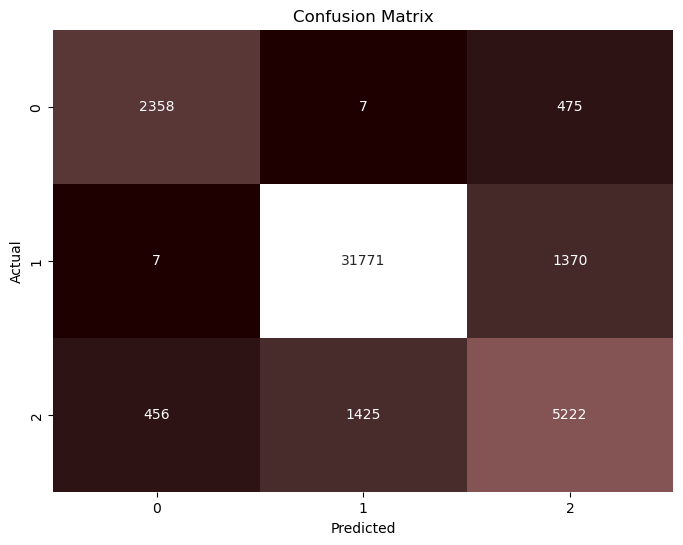

In [226]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Class imbalance

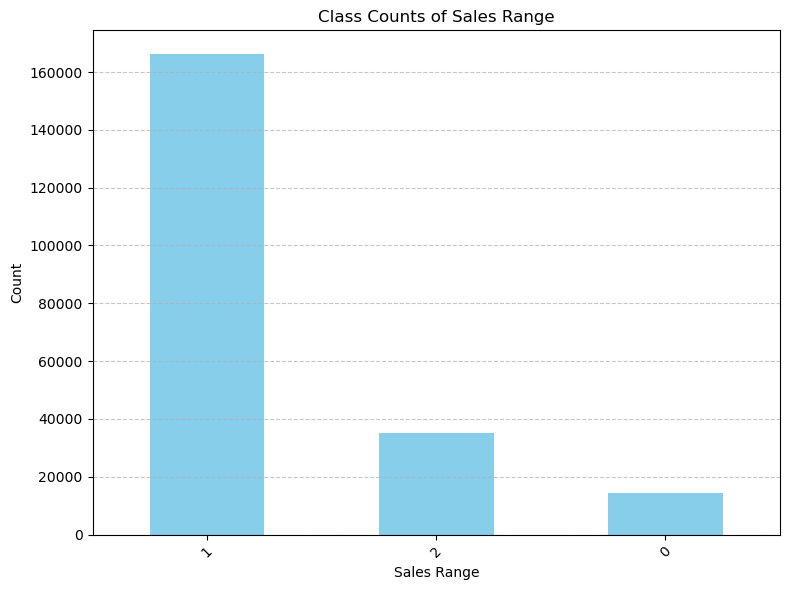

In [227]:
class_counts = filtered_data['sales_range'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Counts of Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [228]:
#sample of low sales
df_0 = filtered_data[filtered_data['sales_range'] == 1].sample(n=14354, random_state=42)

#sample of medium sales
df_1 = filtered_data[filtered_data['sales_range'] == 0].sample(n=14354, random_state=42)

#sample of high sales
df_2 = filtered_data[filtered_data['sales_range'] == 2].sample(n=14354, random_state=42)

#combine the samples
df_sampled = pd.concat([df_0, df_1,df_2])

#shuffle the samples
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

#find its shape
print(df_sampled.shape)

(43062, 115)


In [229]:
df_sampled.head()

,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,...,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric,sales_range
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,5,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,4,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,11,2


In [230]:
df_sampled.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/decision tree_prep_data_sampled.csv')

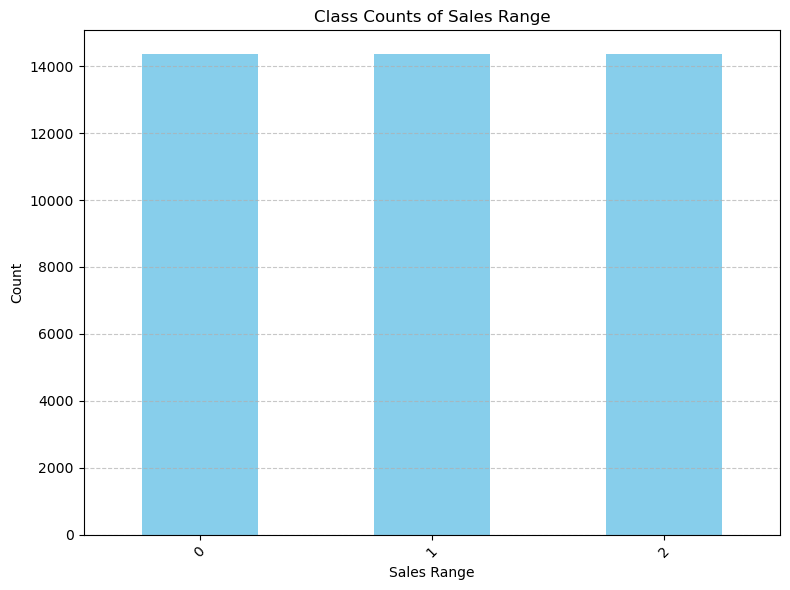

In [231]:
class_counts_1 = df_sampled['sales_range'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts_1.plot(kind='bar', color='skyblue')
plt.title('Class Counts of Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [232]:
#Separate  X and Y
X = df_sampled.drop("sales_range", axis = 1)
y = df_sampled['sales_range']


In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
tree_model = DecisionTreeClassifier(random_state=42,criterion='gini')

# Training the model on the training data
tree_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = tree_model.predict(X_test)

In [235]:
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Compute precision score
precision = precision_score(y_test, y_pred, average='weighted') 

# Compute recall score
recall = recall_score(y_test, y_pred, average='weighted')  

# Compute F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8381516312550795
Precision: 0.8396460134621244
Recall: 0.8381516312550795
F1-Score: 0.8385066910463429
Confusion Matrix:
 [[2576   11  303]
 [  69 2424  392]
 [ 340  279 2219]]


In [248]:
result2 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2890
           1       0.89      0.84      0.87      2885
           2       0.76      0.78      0.77      2838

    accuracy                           0.84      8613
   macro avg       0.84      0.84      0.84      8613
weighted avg       0.84      0.84      0.84      8613



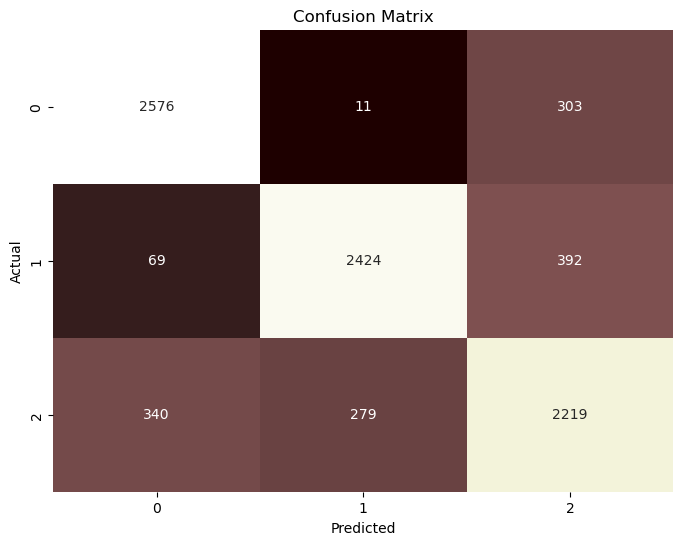

In [236]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [237]:
scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='accuracy')

#cross validation scores with respect to accuracy
print("Cross-Validation Scores:", scores)

#compute mean
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.83976778 0.83222061 0.84412192 0.85166909 0.86298984 0.84557329
 0.84238026 0.83686502 0.84150943 0.84030197]
Mean Accuracy: 0.8437399216828577


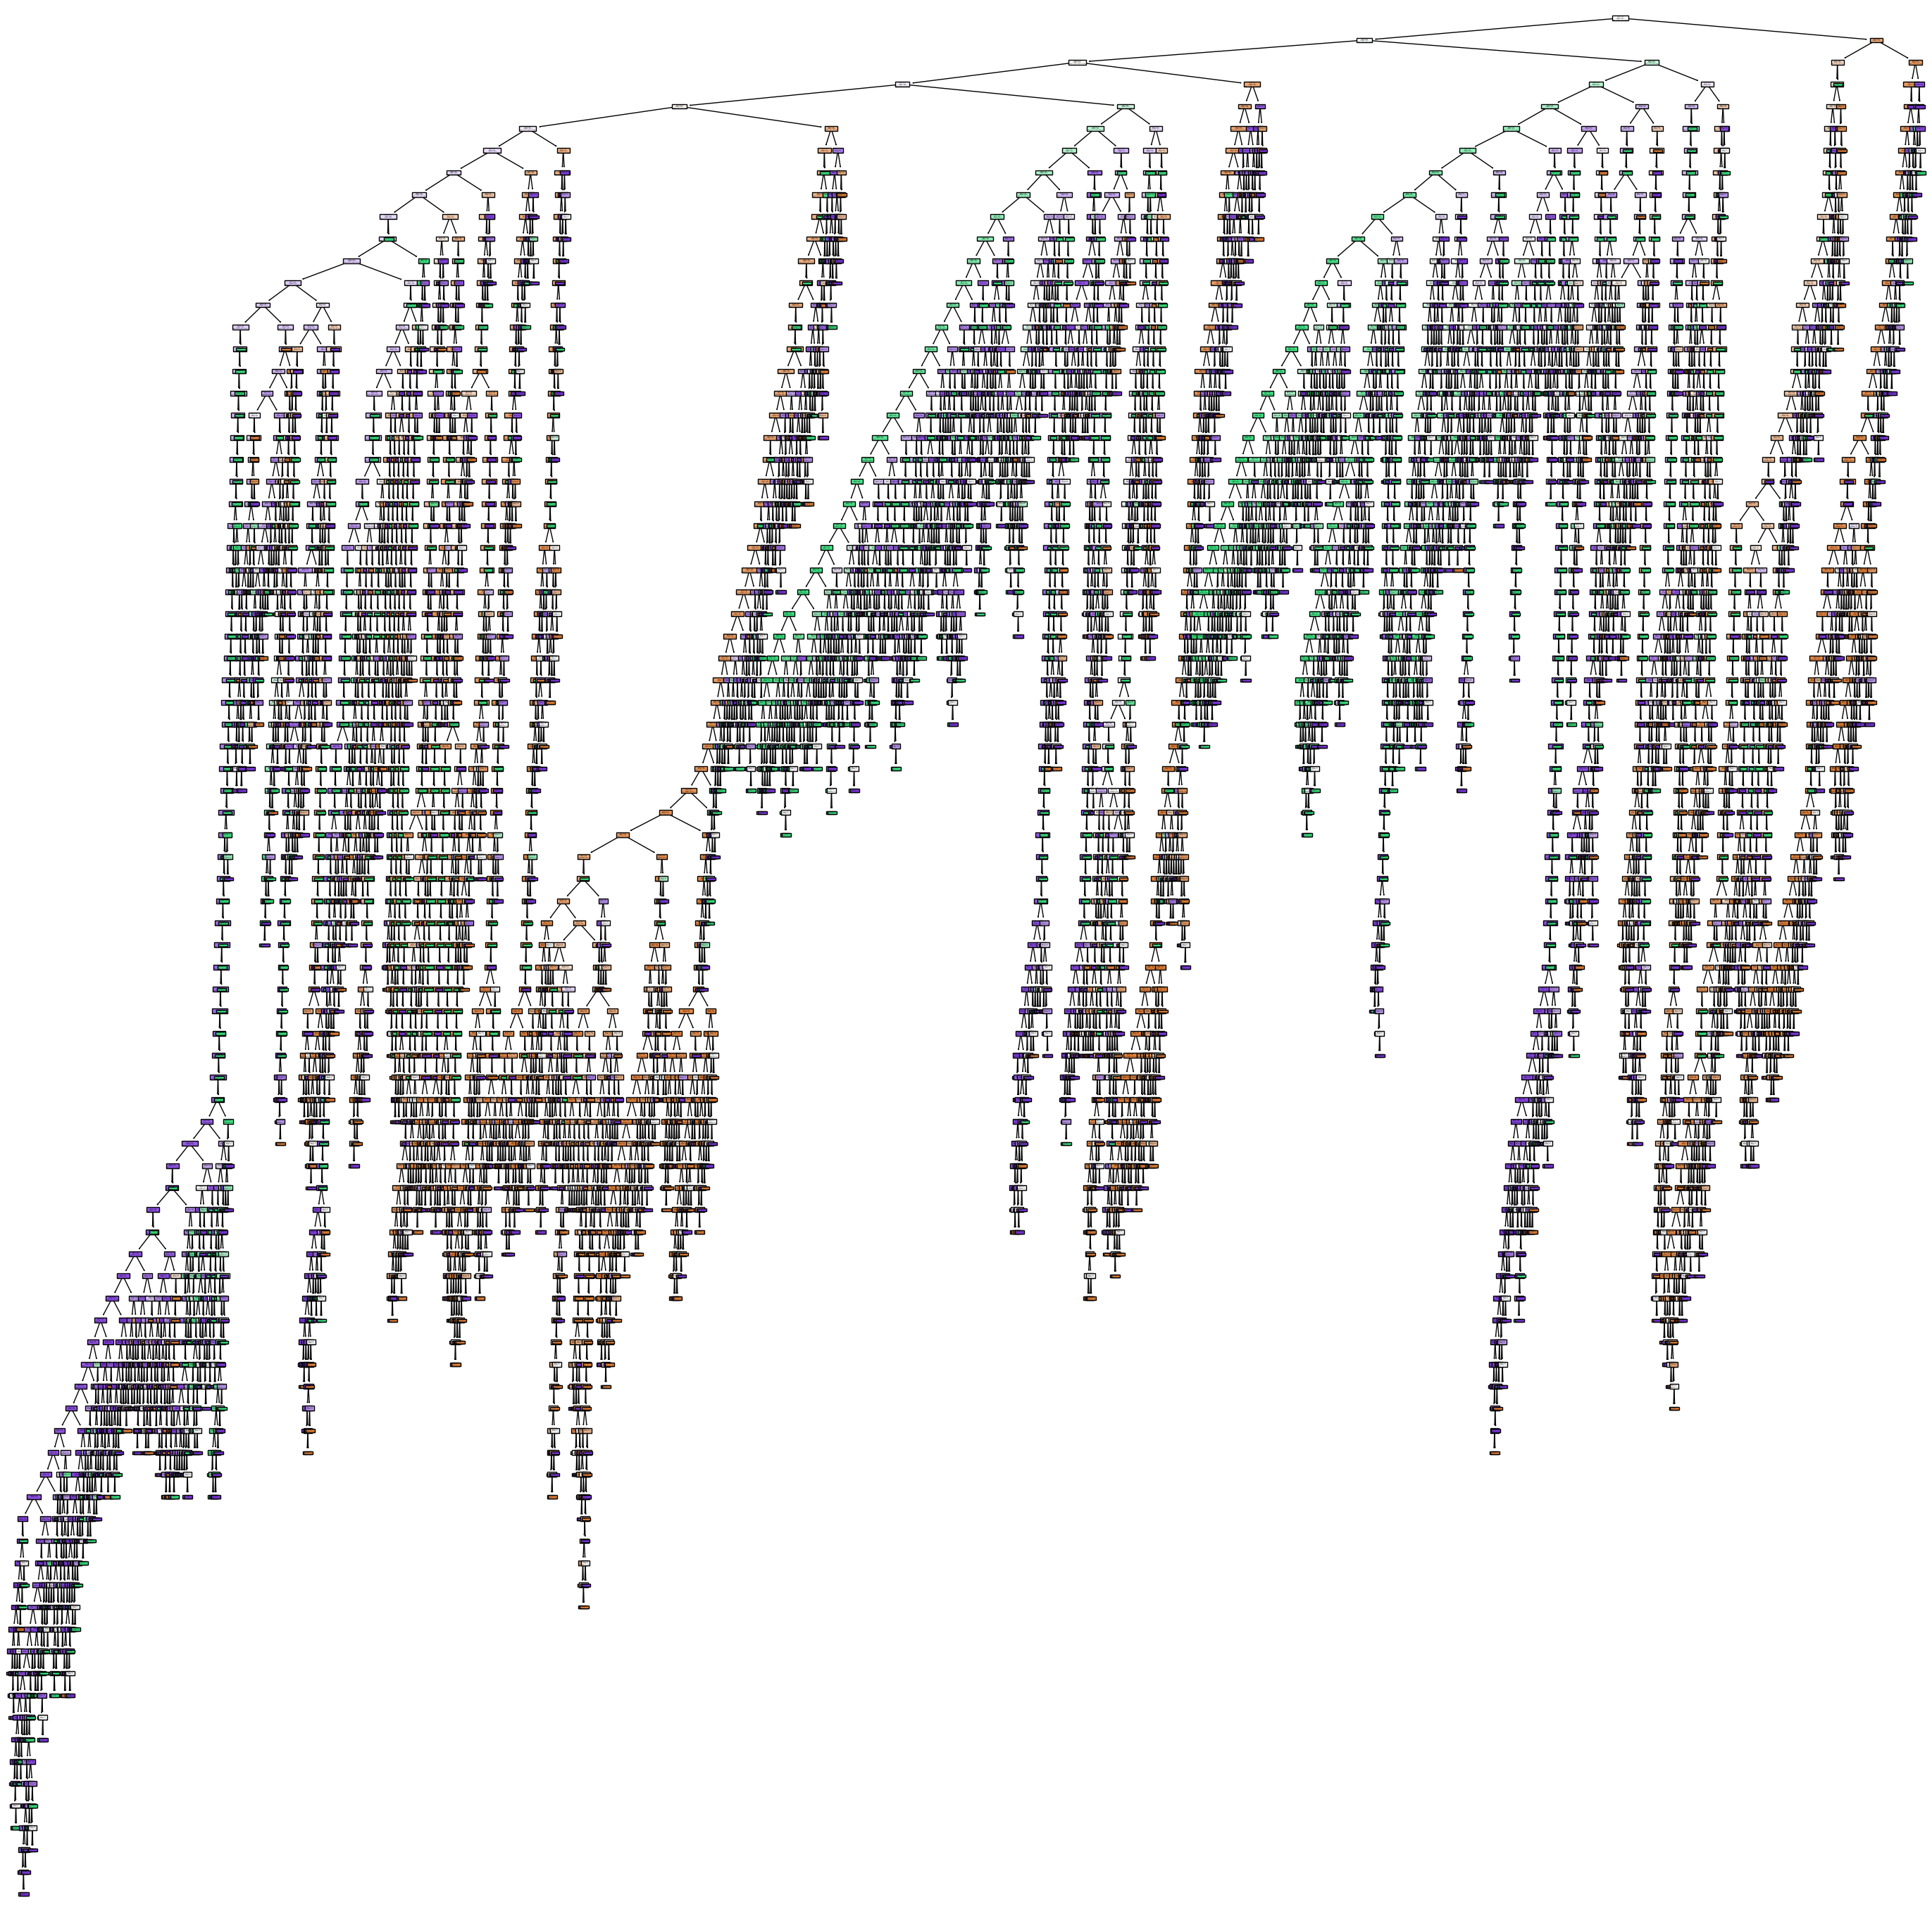

In [238]:
plt.figure(figsize=(35, 35))
plot_tree(tree_model,filled=True)
plt.show()

In [246]:
# Fitting the Decision Tree Classifier with a maximum depth
max_depth = 8  # Set the maximum depth
clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
clf.fit(X_train_1, y_train_1)


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

[Text(0.6451402091254753, 0.9444444444444444, 'x[92] <= 0.5\nentropy = 0.974\nsamples = 172362\nvalue = [11514.0, 132984.0, 27864.0]'),
 Text(0.3668013307984791, 0.8333333333333334, 'x[110] <= 0.5\nentropy = 0.91\nsamples = 163638\nvalue = [8441.0, 129333.0, 25864.0]'),
 Text(0.18512357414448669, 0.7222222222222222, 'x[106] <= 0.5\nentropy = 1.058\nsamples = 98124\nvalue = [7765.0, 72553.0, 17806.0]'),
 Text(0.10266159695817491, 0.6111111111111112, 'x[108] <= 0.5\nentropy = 0.998\nsamples = 93127\nvalue = [5860.0, 70603.0, 16664.0]'),
 Text(0.05988593155893536, 0.5, 'x[88] <= 0.5\nentropy = 0.637\nsamples = 39193\nvalue = [428.0, 33745.0, 5020.0]'),
 Text(0.030418250950570342, 0.3888888888888889, 'x[103] <= 0.5\nentropy = 0.581\nsamples = 36714\nvalue = [228.0, 32102.0, 4384.0]'),
 Text(0.015209125475285171, 0.2777777777777778, 'x[93] <= 0.5\nentropy = 0.537\nsamples = 34852\nvalue = [126.0, 30860.0, 3866.0]'),
 Text(0.0076045627376425855, 0.16666666666666666, 'x[85] <= 0.5\nentropy = 

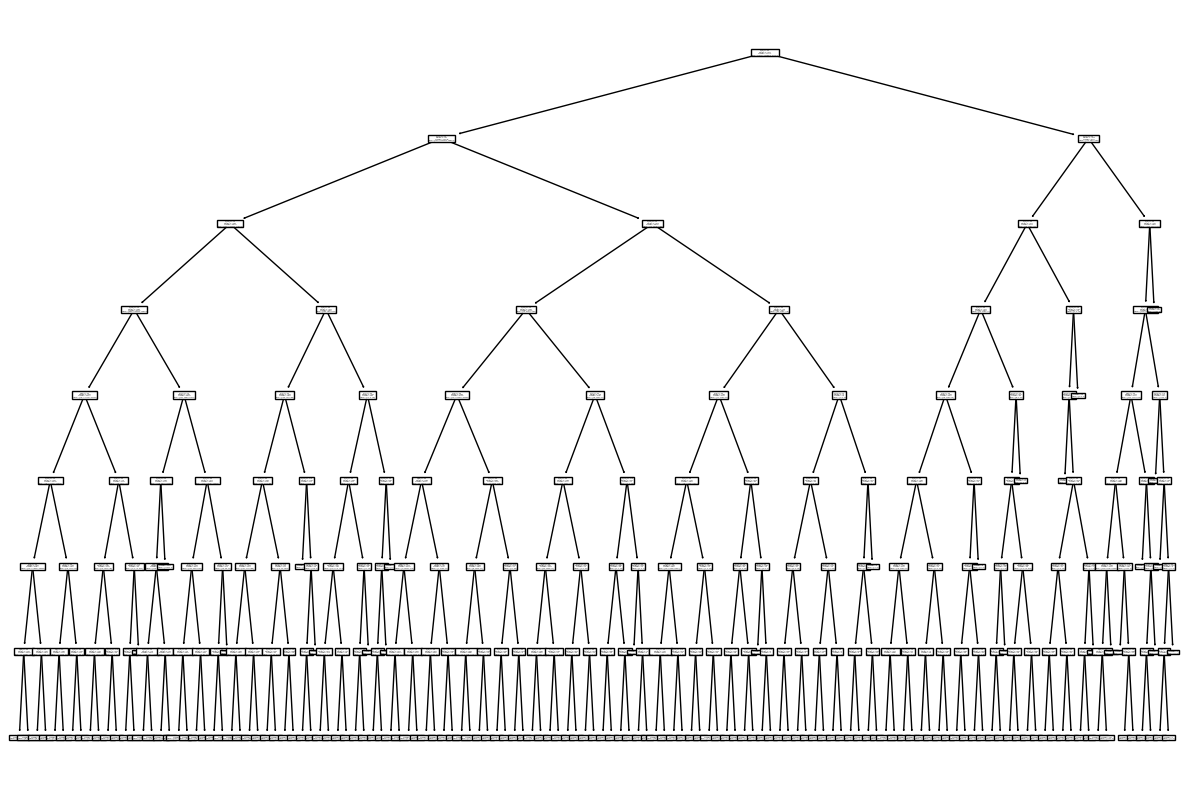

In [240]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf)

In [241]:
# Using Gini impurity as the criterion
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train_1, y_train_1)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'x[92] <= 0.5\ngini = 0.374\nsamples = 172362\nvalue = [11514.0, 132984.0, 27864.0]'),
 Text(0.25, 0.625, 'x[106] <= 0.5\ngini = 0.348\nsamples = 163638\nvalue = [8441.0, 129333.0, 25864.0]'),
 Text(0.125, 0.375, 'x[111] <= 0.5\ngini = 0.324\nsamples = 154814\nvalue = [6186.0, 124914.0, 23714.0]'),
 Text(0.0625, 0.125, 'gini = 0.301\nsamples = 147961\nvalue = [4172, 121636, 22153]'),
 Text(0.1875, 0.125, 'gini = 0.633\nsamples = 6853\nvalue = [2014.0, 3278.0, 1561.0]'),
 Text(0.375, 0.375, 'x[110] <= 0.5\ngini = 0.625\nsamples = 8824\nvalue = [2255, 4419, 2150]'),
 Text(0.3125, 0.125, 'gini = 0.65\nsamples = 4997\nvalue = [1905, 1950, 1142]'),
 Text(0.4375, 0.125, 'gini = 0.506\nsamples = 3827\nvalue = [350, 2469, 1008]'),
 Text(0.75, 0.625, 'x[110] <= 0.5\ngini = 0.648\nsamples = 8724\nvalue = [3073, 3651, 2000]'),
 Text(0.625, 0.375, 'x[16] <= 0.5\ngini = 0.625\nsamples = 4996\nvalue = [2473, 1446, 1077]'),
 Text(0.5625, 0.125, 'gini = 0.619\nsamples = 4862\nvalue =

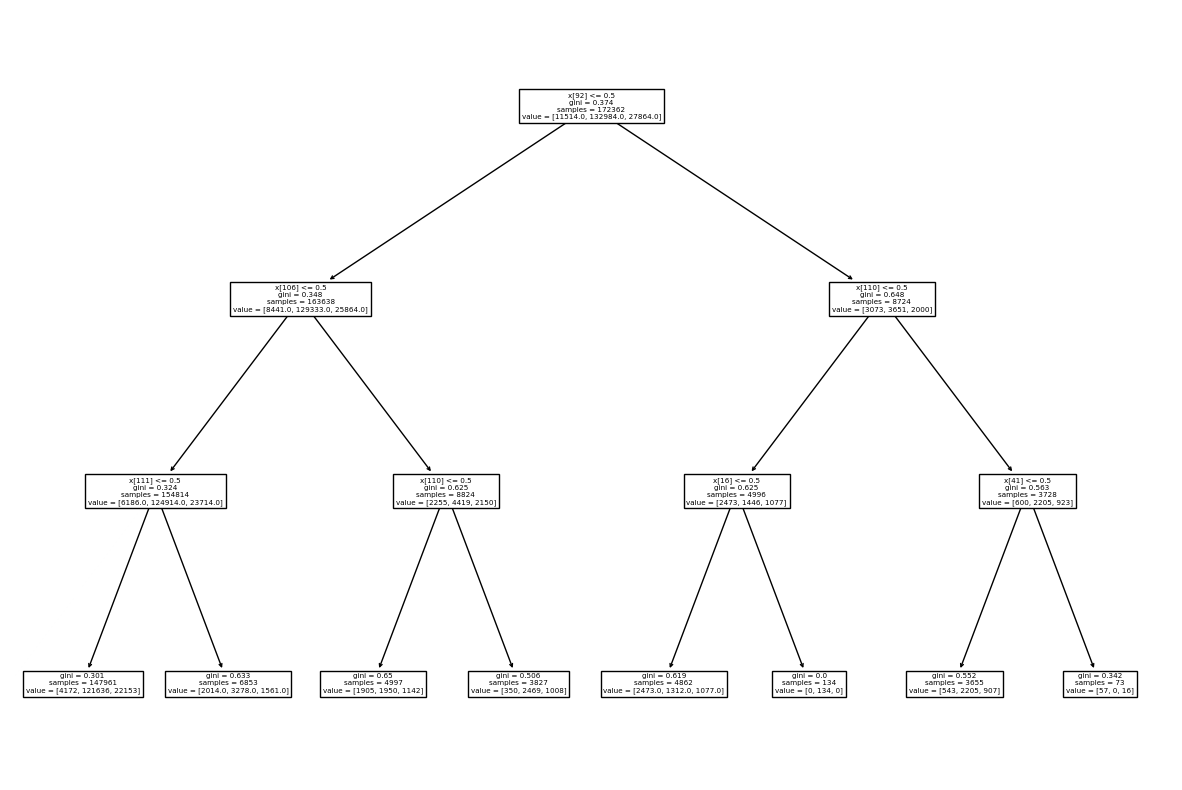

In [242]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_gini)

In [243]:
clf_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_1.fit(X_train_1, y_train_1)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

[Text(0.5, 0.875, 'x[92] <= 0.5\nentropy = 0.974\nsamples = 172362\nvalue = [11514.0, 132984.0, 27864.0]'),
 Text(0.25, 0.625, 'x[110] <= 0.5\nentropy = 0.91\nsamples = 163638\nvalue = [8441.0, 129333.0, 25864.0]'),
 Text(0.125, 0.375, 'x[106] <= 0.5\nentropy = 1.058\nsamples = 98124\nvalue = [7765.0, 72553.0, 17806.0]'),
 Text(0.0625, 0.125, 'entropy = 0.998\nsamples = 93127\nvalue = [5860.0, 70603.0, 16664.0]'),
 Text(0.1875, 0.125, 'entropy = 1.547\nsamples = 4997\nvalue = [1905, 1950, 1142]'),
 Text(0.375, 0.375, 'x[106] <= 0.5\nentropy = 0.619\nsamples = 65514\nvalue = [676, 56780, 8058]'),
 Text(0.3125, 0.125, 'entropy = 0.559\nsamples = 61687\nvalue = [326, 54311, 7050]'),
 Text(0.4375, 0.125, 'entropy = 1.23\nsamples = 3827\nvalue = [350, 2469, 1008]'),
 Text(0.75, 0.625, 'x[112] <= 0.5\nentropy = 1.543\nsamples = 8724\nvalue = [3073, 3651, 2000]'),
 Text(0.625, 0.375, 'x[41] <= 0.5\nentropy = 1.371\nsamples = 3728\nvalue = [600, 2205, 923]'),
 Text(0.5625, 0.125, 'entropy = 1.

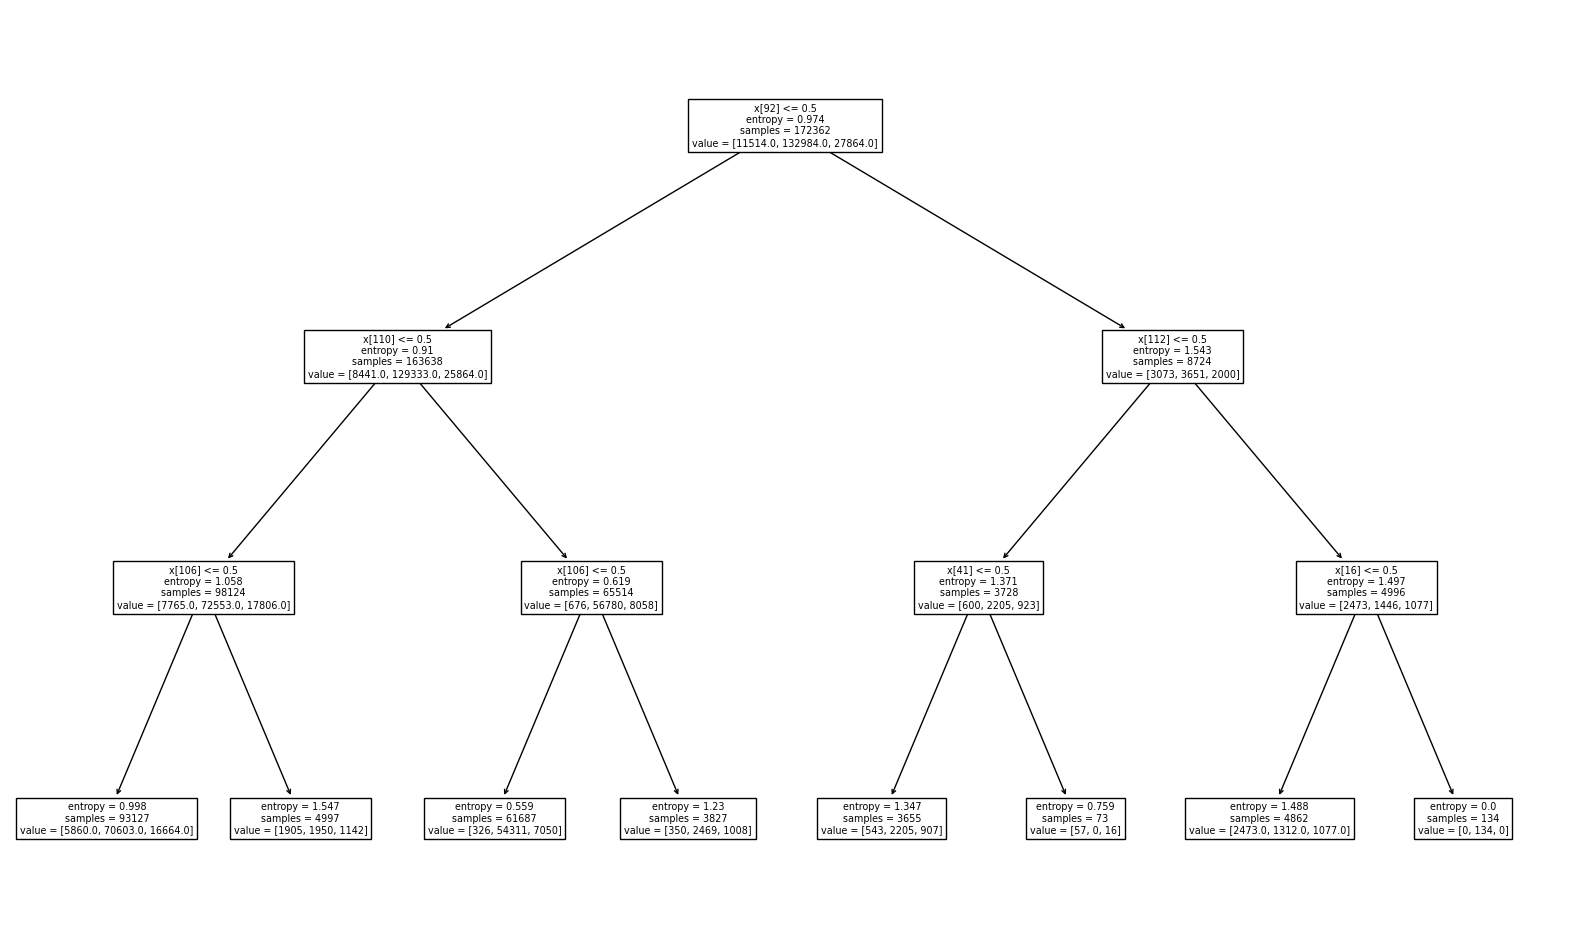

In [244]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_1)